In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [2]:
path = 'results/runs'
exps = os.listdir(path)

In [3]:
dfs = []
for folder in exps:
    if folder != ".DS_Store":
        exp_folders = os.listdir(os.path.join(path, folder))
        for expsf in exp_folders:
            try:
                files = os.listdir(os.path.join(path, folder, expsf))
                file_path = os.path.join(path, folder, expsf, 'result.json')
                with open(file_path, "r") as f:
                    data = json.load(f)
                df = pd.json_normalize(data)
                dfs.append(df)
            except:
                "Not a folder"
results = pd.concat(dfs)
#results.to_csv('results_he_checkerboard_ccka.csv')

In [14]:
results.columns

Index(['num_layers', 'accuracy_train_init', 'accuracy_test_init',
       'alignment_train_init', 'accuracy_train_final', 'accuracy_test_final',
       'alignment_train_epochs', 'circuit_executions', 'timestamp',
       'checkpoint_dir_name', 'done', 'training_iteration', 'trial_id', 'date',
       'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'iterations_since_restore', 'config.name',
       'config.file', 'config.n_samples', 'config.noise', 'config.num_sectors',
       'config.points_per_sector', 'config.grid_size',
       'config.sampling_radius', 'config.training_size', 'config.testing_size',
       'config.validation_size', 'config.device', 'config.n_qubits',
       'config.trainable', 'config.input_scaling', 'config.data_reuploading',
       'config.ansatz', 'config.ansatz_layers', 'config.optimizer',
       'config.lr', 'config.mclr', 'config.cclr', 'config.epochs',
       'config.train_method', 'config.target_accuracy',
       'co

In [ ]:
# Create a copy to avoid SettingWithCopyWarning
results_checkerboard = results[results['config.name'] == 'checkerboard'].copy()

# Properly concatenate the columns into 'unique_config'
results_checkerboard['unique_config'] = (
    results_checkerboard['config.name'].astype(str) + ' ' +
    results_checkerboard['config.n_qubits'].astype(str) + ' ' +
    results_checkerboard['config.ansatz'].astype(str) + ' ' +
    results_checkerboard['config.train_method'].astype(str) + ' ' +
    results_checkerboard['config.clusters'].astype(str)
)

# Select only the required columns
required_columns = [
    'unique_config',
    'config.name',
    'config.n_qubits',
    'config.ansatz', 
    'config.train_method', 
    'config.clusters',
    'accuracy_train_init', 
    'accuracy_test_init',
    'alignment_train_init', 
    'accuracy_train_final', 
    'accuracy_test_final',
    'alignment_train_epochs', 
    'circuit_executions',
    'time_this_iter_s'
]

results_checkerboard = results_checkerboard[required_columns]

# Group by 'unique_config' and compute the mean for numerical columns
accuracy = results_checkerboard[['unique_config', 'config.name','config.n_qubits','config.ansatz', 'config.train_method','config.clusters', 'accuracy_test_init', 'accuracy_test_final']]
grouped_accuracy = accuracy.groupby(['unique_config', 'config.name','config.n_qubits','config.ansatz', 'config.train_method','config.clusters'], as_index=False).mean()



,unique_config,config.name,config.n_qubits,config.ansatz,config.train_method,config.clusters,accuracy_test_init,accuracy_test_final
0,checkerboard 10 embedding_paper ccka 10,checkerboard,10,embedding_paper,ccka,10,0.833333,1.000000
1,checkerboard 10 embedding_paper ccka 2,checkerboard,10,embedding_paper,ccka,2,0.833333,1.000000
2,checkerboard 10 embedding_paper ccka 4,checkerboard,10,embedding_paper,ccka,4,0.833333,1.000000
3,checkerboard 10 embedding_paper ccka 6,checkerboard,10,embedding_paper,ccka,6,0.833333,1.000000
4,checkerboard 10 embedding_paper ccka 8,checkerboard,10,embedding_paper,ccka,8,0.833333,1.000000
5,checkerboard 10 embedding_paper full 2,checkerboard,10,embedding_paper,full,2,0.833333,0.966667
6,checkerboard 10 embedding_paper quack 2,checkerboard,10,embedding_paper,quack,2,0.833333,1.000000
7,checkerboard 10 embedding_paper random 10,checkerboard,10,embedding_paper,random,10,0.833333,1.000000
8,checkerboard 10 embedding_paper random 2,checkerboard,10,embedding_paper,random,2,0.833333,1.000000
9,checkerboard 10 embedding_paper random 4,checkerboard,10,embedding_paper,random,4,0.833333,1.000000


In [19]:
results_01_checkerboard = results_01.where(results['config.name'] == 'checkerboard')
results_01_checkerboard = results_01_checkerboard[['accuracy_train_init', 'accuracy_test_init', 'alignment_train_init', 'accuracy_train_final', 'accuracy_test_final',
       'alignment_train_epochs', 'circuit_executions', 'config.name',
       'config.lr', 'config.mclr', 'config.cclr', 'config.epochs',
       'config.train_method',
       'config.clusters']].dropna()


In [20]:
results_01_double_cake = results_01.where(results['config.name'] == 'double_cake')
results_01_double_cake = results_01_double_cake[['accuracy_train_init', 'accuracy_test_init', 'alignment_train_init', 'accuracy_train_final', 'accuracy_test_final',
       'alignment_train_epochs', 'circuit_executions', 'config.name',
       'config.lr', 'config.mclr', 'config.cclr', 'config.epochs',
       'config.train_method',
       'config.clusters']].dropna()

In [21]:
results_01_corners = results_01.where(results['config.name'] == 'corners')
results_01_corners = results_01_corners[['accuracy_train_init', 'accuracy_test_init', 'alignment_train_init', 'accuracy_train_final', 'accuracy_test_final',
       'alignment_train_epochs', 'circuit_executions', 'config.name',
       'config.lr', 'config.mclr', 'config.cclr', 'config.epochs',
       'config.train_method',
       'config.clusters']].dropna()

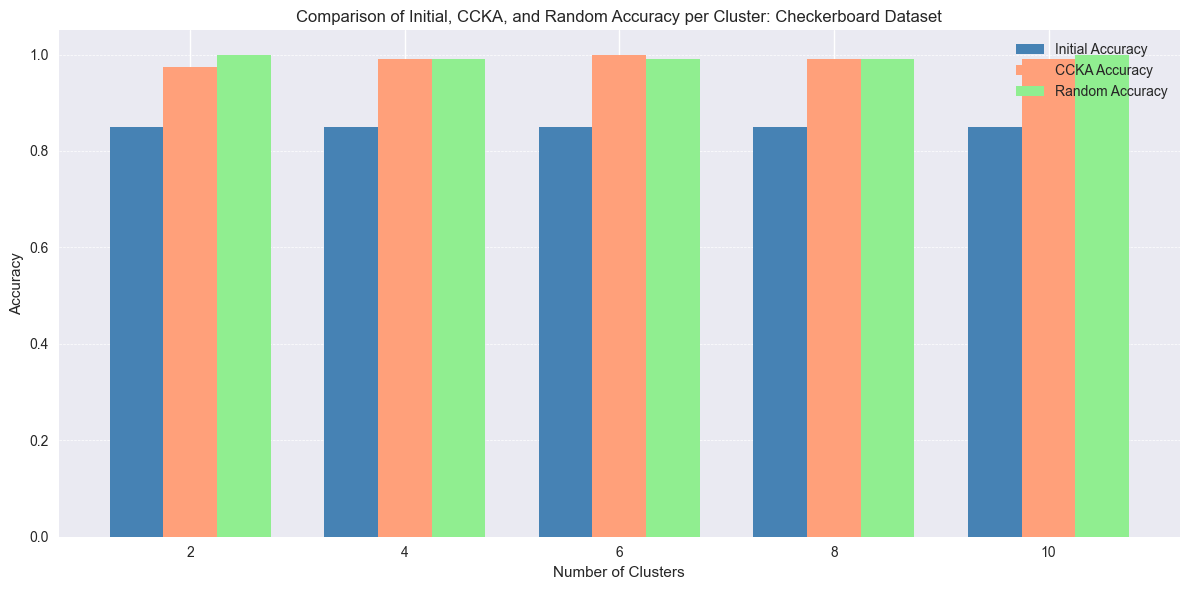

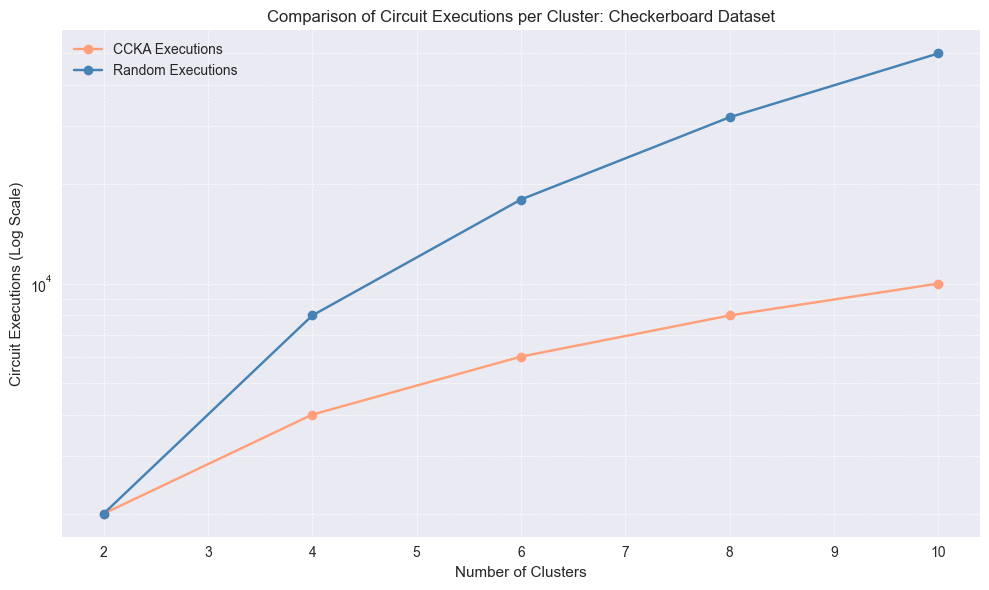

/var/folders/6p/6s2w1nyx4cj4bm1gbt3psk7r0000gn/T/ipykernel_95556/2684270663.py:99: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


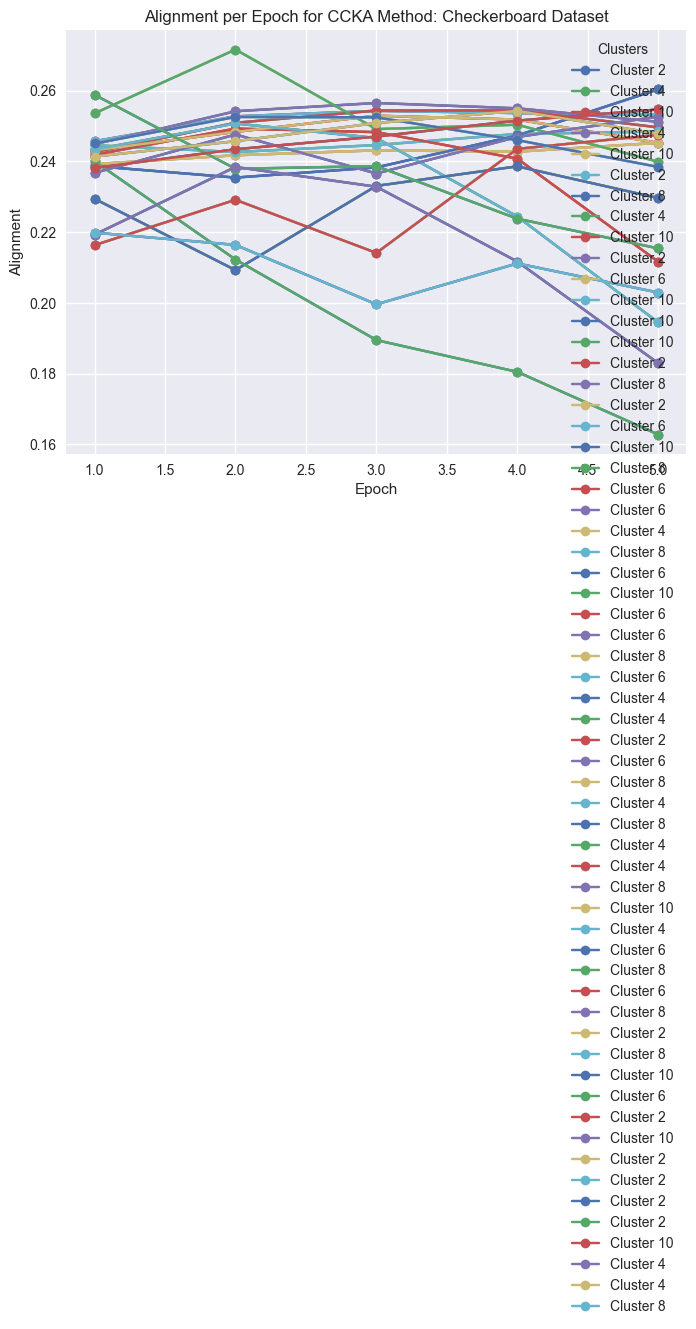

/var/folders/6p/6s2w1nyx4cj4bm1gbt3psk7r0000gn/T/ipykernel_95556/2684270663.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Clusters")


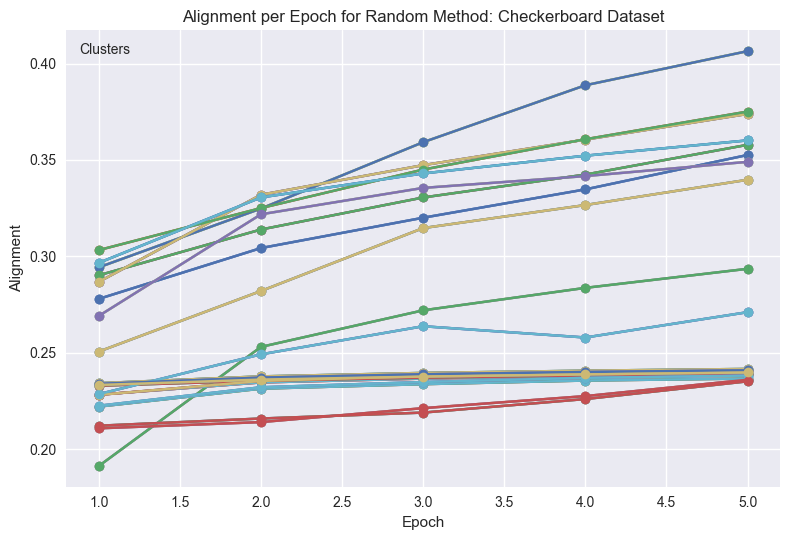

In [22]:
## Comparision per Algorithm : Checkerboard

# Plotting joint bar graph
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
#========================================#
#Accuracy
#========================================#

# Prepare data for plotting
clusters = [2, 4, 6, 8, 10]
initial_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'ccka']\
    .groupby('config.clusters')['accuracy_test_init'].mean()
ccka_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'ccka']\
    .groupby('config.clusters')['accuracy_test_final'].mean()
random_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'random']\
    .groupby('config.clusters')['accuracy_test_final'].mean()

cluster_indices = np.arange(len(clusters))  # Numeric indices for clusters
bar_width = 0.25  # Width of each bar

# Bars for Initial Accuracy
plt.bar(cluster_indices - bar_width, [initial_means.get(c, 0) for c in clusters], width=bar_width,
        label='Initial Accuracy', color='#4682b4')  # Light blue

# Bars for CCKA Accuracy
plt.bar(cluster_indices, [ccka_means.get(c, 0) for c in clusters], width=bar_width,
        label='CCKA Accuracy', color='#ffa07a')  # Salmon orange

# Bars for Random Accuracy
plt.bar(cluster_indices + bar_width, [random_means.get(c, 0) for c in clusters], width=bar_width,
        label='Random Accuracy', color='#90EE90')  # Light green

# Add labels, title, and legend
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy")
plt.title("Comparison of Initial, CCKA, and Random Accuracy per Cluster: Checkerboard Dataset")
plt.xticks(cluster_indices, clusters)  # Set cluster labels on x-axis
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

#========================================#
#Circuit Executions
#========================================#

# Convert the y-axis to a logarithmic scale for Circuit Executions
final_color = '#ffa07a'
initial_color = '#4682b4'
# Filter the data for different training methods
ccka = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'ccka']
random = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'random']

# Calculate mean circuit executions for ccka and random methods per cluster
ccka_means = ccka.groupby('config.clusters')['circuit_executions'].mean()
random_means = random.groupby('config.clusters')['circuit_executions'].mean()

# Plotting circuit executions for each method
plt.figure(figsize=(10, 6))
plt.plot(clusters, [ccka_means.get(c, None) for c in clusters], marker='o', label='CCKA Executions', color=final_color)
plt.plot(clusters, [random_means.get(c, None) for c in clusters], marker='o', label='Random Executions', color=initial_color)

# Add labels, title, and legend
plt.xlabel("Number of Clusters")
plt.ylabel("Circuit Executions (Log Scale)")
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title("Comparison of Circuit Executions per Cluster: Checkerboard Dataset")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

#========================================#
#Alignments
#========================================#


# Filter data for each training method
ccka_epochs = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'ccka']
random_epochs = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'random']

# Line plot for alignment across epochs per cluster
for i, row in ccka_epochs.iterrows():
    plt.plot(range(1, len(row['alignment_train_epochs']) + 1), row['alignment_train_epochs'],
             marker='o', label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Alignment per Epoch for CCKA Method: Checkerboard Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Line plot for alignment across epochs per cluster
for i, row in random_epochs.iterrows():
    plt.plot(range(1, len(row['alignment_train_epochs']) + 1), row['alignment_train_epochs'],
             marker='o')#, label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Alignment per Epoch for Random Method: Checkerboard Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

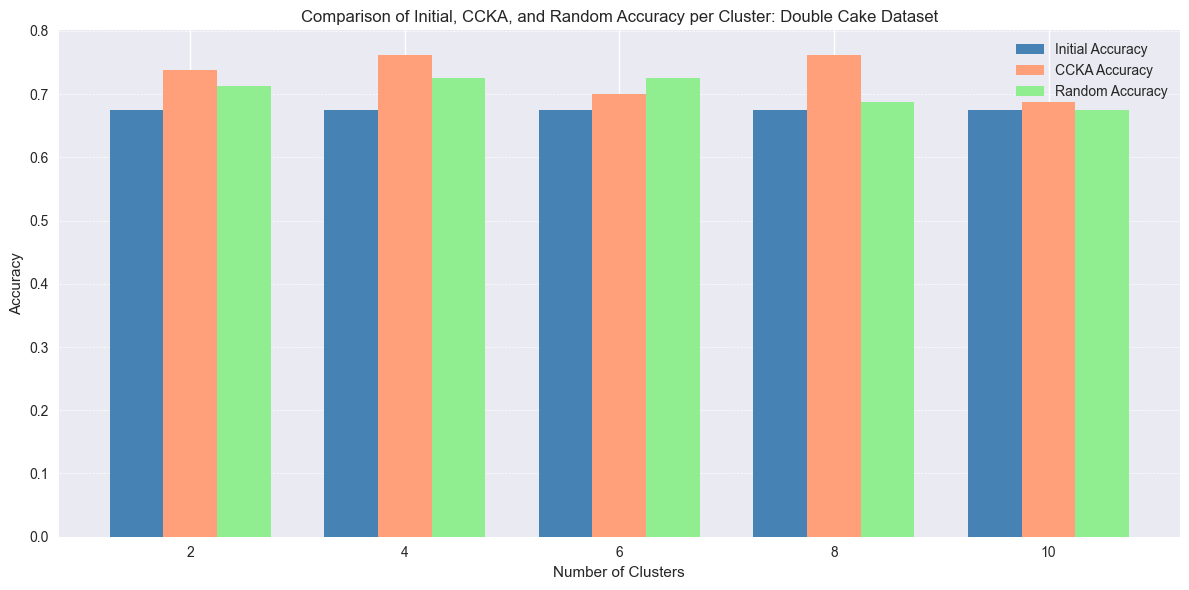

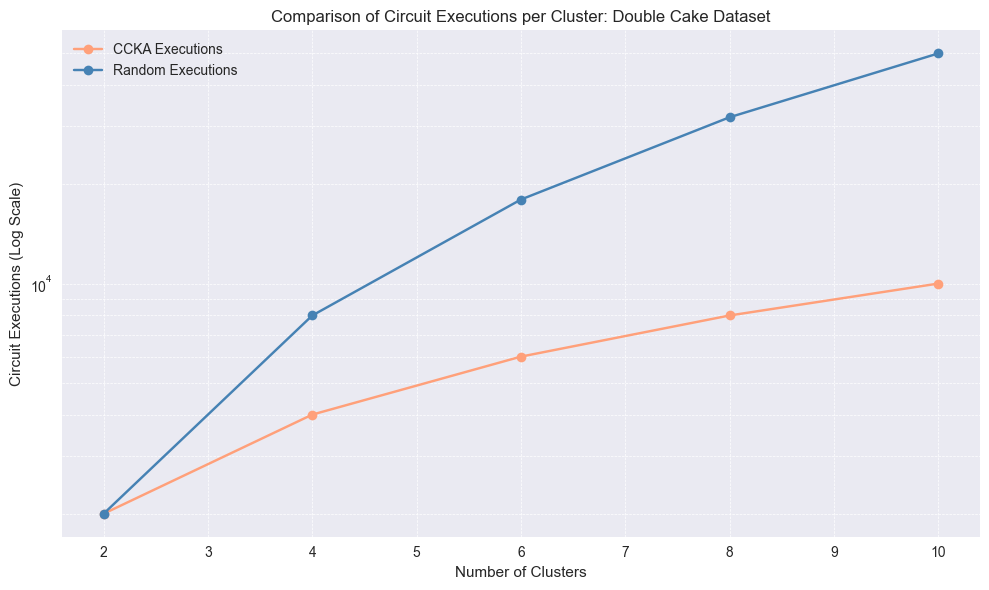

/var/folders/6p/6s2w1nyx4cj4bm1gbt3psk7r0000gn/T/ipykernel_95556/1780111871.py:102: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


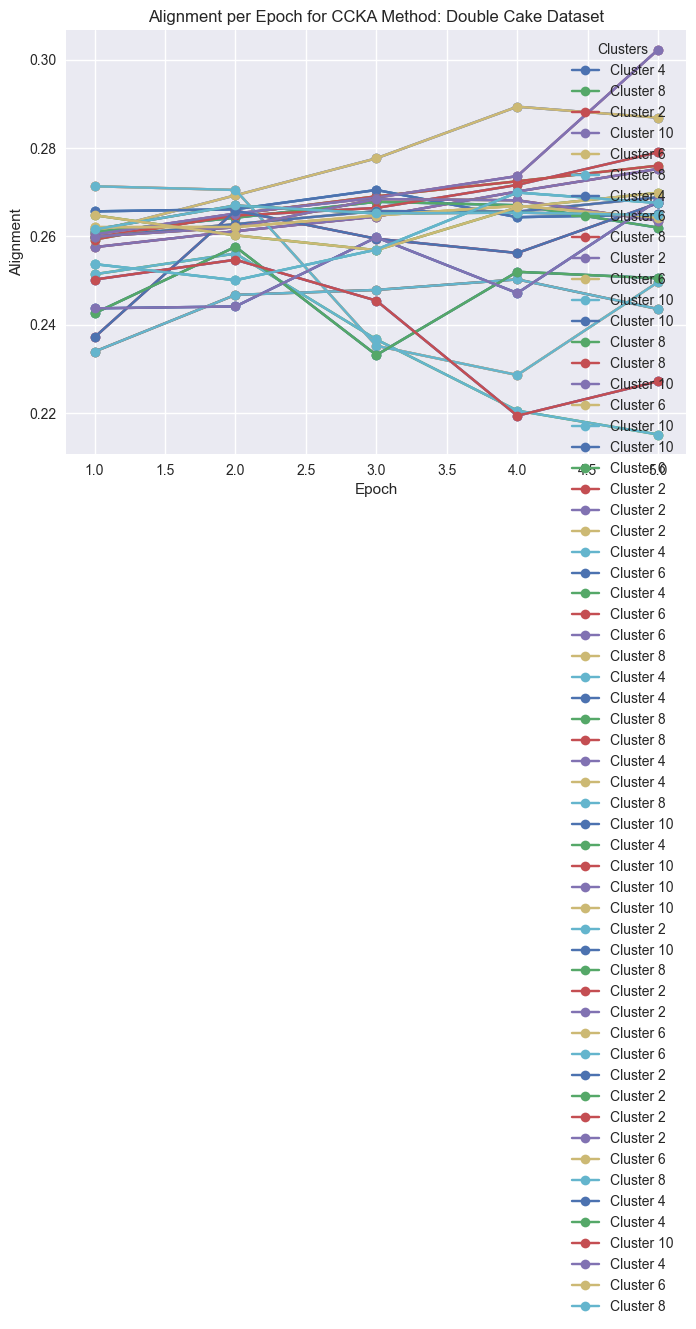

/var/folders/6p/6s2w1nyx4cj4bm1gbt3psk7r0000gn/T/ipykernel_95556/1780111871.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


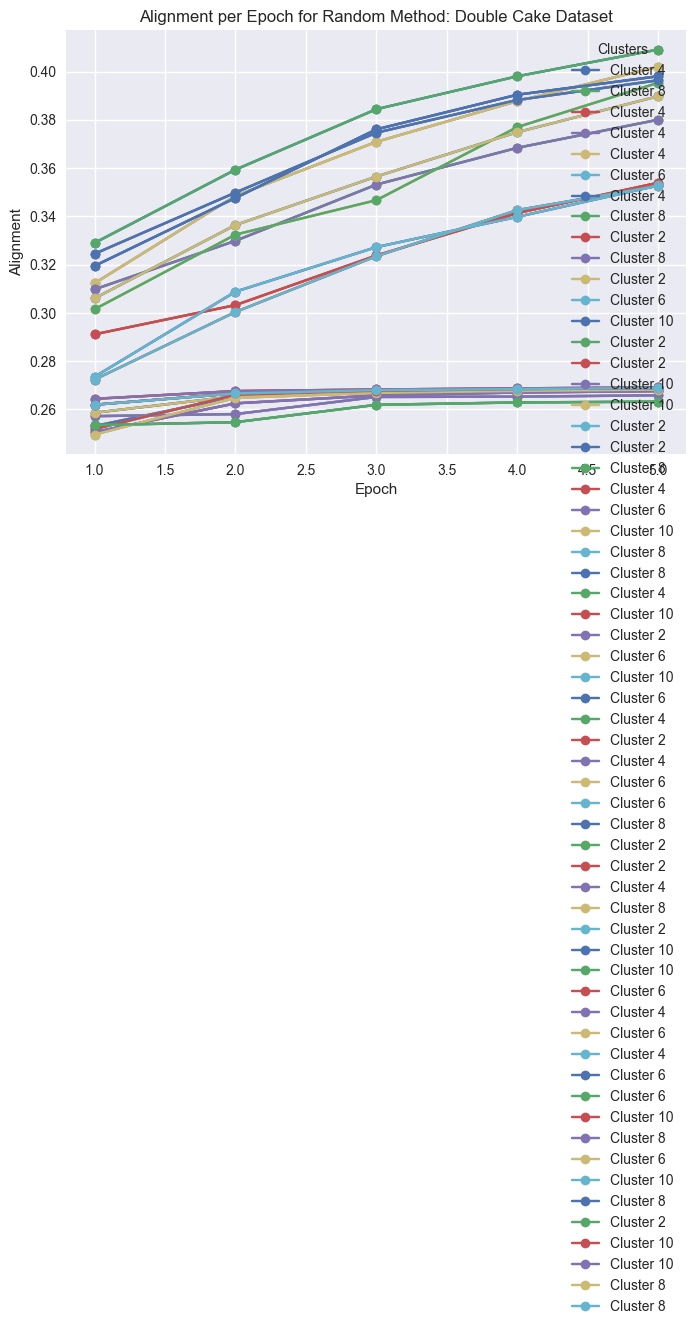

In [23]:
## Comparision per Algorithm : Double Cake

# Plotting joint bar graph
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
#========================================#
#Accuracy
#========================================#

# Prepare data for plotting
clusters = [2, 4, 6, 8, 10]
initial_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'ccka']\
    .groupby('config.clusters')['accuracy_test_init'].mean()
ccka_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'ccka']\
    .groupby('config.clusters')['accuracy_test_final'].mean()
random_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'random']\
    .groupby('config.clusters')['accuracy_test_final'].mean()

cluster_indices = np.arange(len(clusters))  # Numeric indices for clusters
bar_width = 0.25  # Width of each bar

# Bars for Initial Accuracy
plt.bar(cluster_indices - bar_width, [initial_means.get(c, 0) for c in clusters], width=bar_width,
        label='Initial Accuracy', color='#4682b4')  # Light blue

# Bars for CCKA Accuracy
plt.bar(cluster_indices, [ccka_means.get(c, 0) for c in clusters], width=bar_width,
        label='CCKA Accuracy', color='#ffa07a')  # Salmon orange

# Bars for Random Accuracy
plt.bar(cluster_indices + bar_width, [random_means.get(c, 0) for c in clusters], width=bar_width,
        label='Random Accuracy', color='#90EE90')  # Light green

# Add labels, title, and legend
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy")
plt.title("Comparison of Initial, CCKA, and Random Accuracy per Cluster: Double Cake Dataset")
plt.xticks(cluster_indices, clusters)  # Set cluster labels on x-axis
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

#========================================#
#Circuit Executions
#========================================#

# Convert the y-axis to a logarithmic scale for Circuit Executions

# Filter the data for different training methods
ccka = results_01_double_cake[results_01_double_cake['config.train_method'] == 'ccka']
random = results_01_double_cake[results_01_double_cake['config.train_method'] == 'random']

# Calculate mean circuit executions for ccka and random methods per cluster
ccka_means = ccka.groupby('config.clusters')['circuit_executions'].mean()
random_means = random.groupby('config.clusters')['circuit_executions'].mean()

# Plotting circuit executions for each method
plt.figure(figsize=(10, 6))
plt.plot(clusters, [ccka_means.get(c, None) for c in clusters], marker='o', label='CCKA Executions', color=final_color)
plt.plot(clusters, [random_means.get(c, None) for c in clusters], marker='o', label='Random Executions', color=initial_color)

# Add labels, title, and legend
plt.xlabel("Number of Clusters")
plt.ylabel("Circuit Executions (Log Scale)")
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title("Comparison of Circuit Executions per Cluster: Double Cake Dataset")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

#========================================#
#Alignments
#========================================#

"""
Add alignment for best performing accuracy withing 5 runs
"""

# Filter data for each training method
ccka_epochs = results_01_double_cake[results_01_double_cake['config.train_method'] == 'ccka']
random_epochs = results_01_double_cake[results_01_double_cake['config.train_method'] == 'random']

# Line plot for alignment across epochs per cluster
for i, row in ccka_epochs.iterrows():
    plt.plot(range(1, len(row['alignment_train_epochs']) + 1), row['alignment_train_epochs'],
             marker='o', label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Alignment per Epoch for CCKA Method: Double Cake Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Line plot for alignment across epochs per cluster
for i, row in random_epochs.iterrows():
    plt.plot(range(1, len(row['alignment_train_epochs']) + 1), row['alignment_train_epochs'],
             marker='o', label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Alignment per Epoch for Random Method: Double Cake Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
# Filter data for each training method
ccka_epochs = results_01_double_cake[results_01_double_cake['config.train_method'] == 'ccka']
random_epochs = results_01_double_cake[results_01_double_cake['config.train_method'] == 'random']

# Function to get the best-performing accuracy row for each configuration
def get_best_accuracy_row(df):
    best_rows = []
    grouped = df.groupby(['config.clusters'])
    for name, group in grouped:
        best_row = group.loc[group['accuracy_test_final'].idxmax()]  # Row with maximum accuracy
        best_rows.append(best_row.to_dict())  # Convert row to a dictionary
    return pd.DataFrame(best_rows)  # Create a DataFrame from dictionaries

# Get best accuracy rows for both methods
best_ccka_epochs = get_best_accuracy_row(ccka_epochs)
best_random_epochs = get_best_accuracy_row(random_epochs)

# Line plot for alignment across epochs for best-performing configurations in CCKA method
for i, row in best_ccka_epochs.iterrows():
    alignment = row['alignment_train_epochs']  # Assuming this column contains lists of alignment values
    plt.plot(range(1, len(alignment) + 1), alignment, marker='o', label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Best-Performing Alignment per Epoch for CCKA Method: Double Cake Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Line plot for alignment across epochs for best-performing configurations in Random method
for i, row in best_random_epochs.iterrows():
    alignment = row['alignment_train_epochs']  # Assuming this column contains lists of alignment values
    plt.plot(range(1, len(alignment) + 1), alignment, marker='o', label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Best-Performing Alignment per Epoch for Random Method: Double Cake Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


TypeError: int() argument must be a string, a bytes-like object or a number, not 'dict'

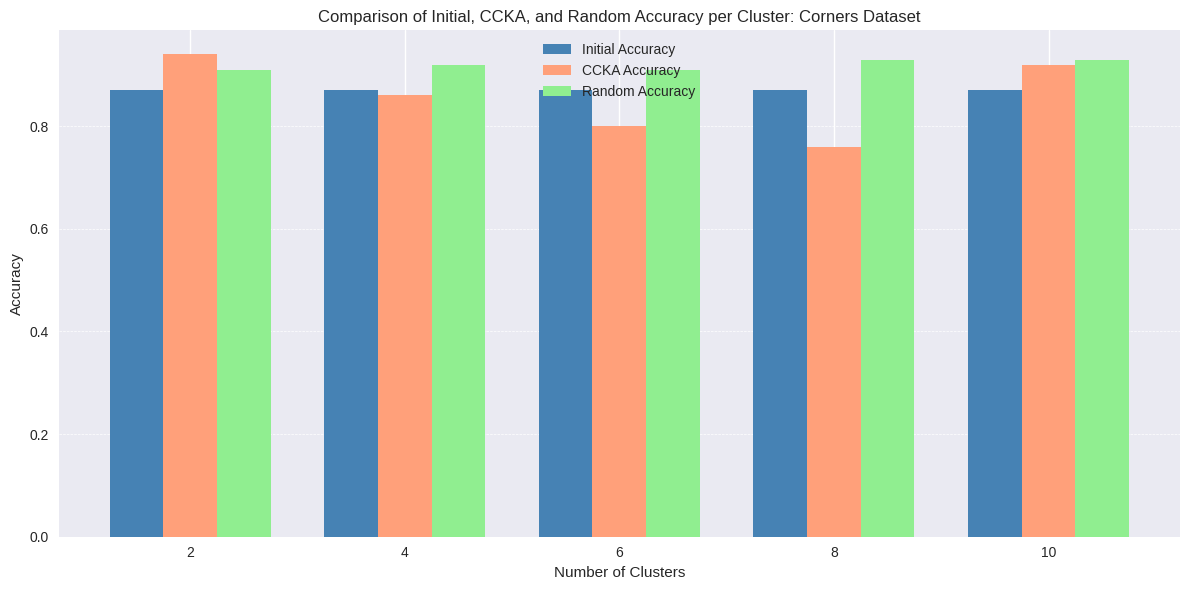

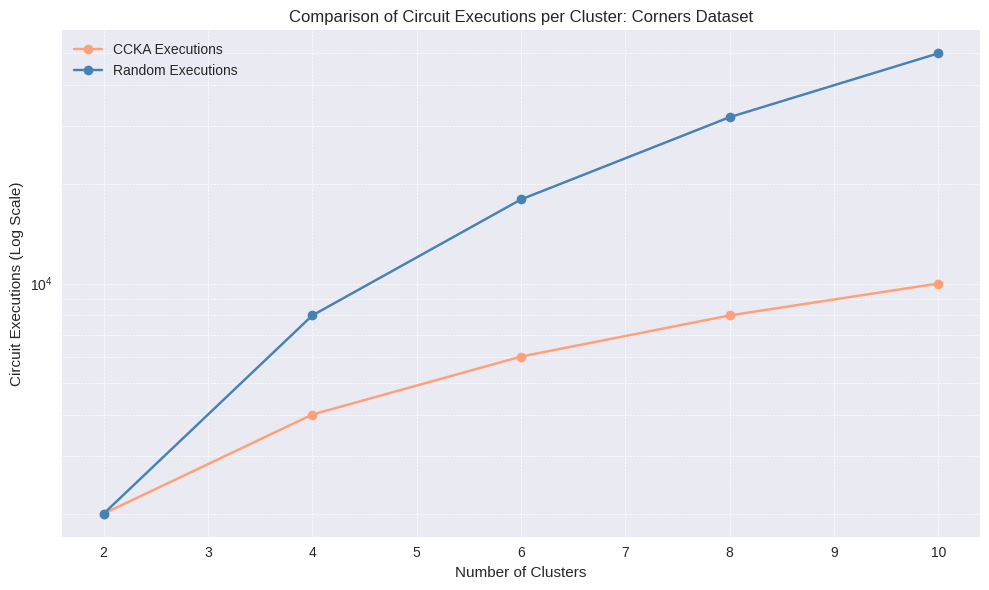

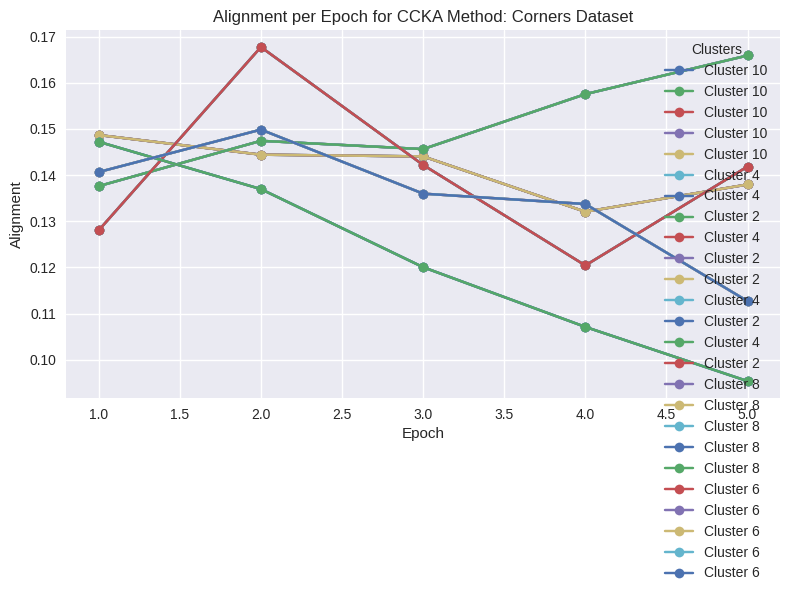

AttributeError: 'float' object has no attribute 'mean'

In [ ]:
## Comparision per Algorithm : Corners

# Plotting joint bar graph
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
#========================================#
#Accuracy
#========================================#

# Prepare data for plotting
clusters = [2, 4, 6, 8, 10]
initial_means = results_01_corners[results_01_corners['config.train_method'] == 'ccka']\
    .groupby('config.clusters')['accuracy_test_init'].mean()
ccka_means = results_01_corners[results_01_corners['config.train_method'] == 'ccka']\
    .groupby('config.clusters')['accuracy_test_final'].mean()
random_means = results_01_corners[results_01_corners['config.train_method'] == 'random']\
    .groupby('config.clusters')['accuracy_test_final'].mean()

cluster_indices = np.arange(len(clusters))  # Numeric indices for clusters
bar_width = 0.25  # Width of each bar

# Bars for Initial Accuracy
plt.bar(cluster_indices - bar_width, [initial_means.get(c, 0) for c in clusters], width=bar_width,
        label='Initial Accuracy', color='#4682b4')  # Light blue

# Bars for CCKA Accuracy
plt.bar(cluster_indices, [ccka_means.get(c, 0) for c in clusters], width=bar_width,
        label='CCKA Accuracy', color='#ffa07a')  # Salmon orange

# Bars for Random Accuracy
plt.bar(cluster_indices + bar_width, [random_means.get(c, 0) for c in clusters], width=bar_width,
        label='Random Accuracy', color='#90EE90')  # Light green

# Add labels, title, and legend
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy")
plt.title("Comparison of Initial, CCKA, and Random Accuracy per Cluster: Corners Dataset")
plt.xticks(cluster_indices, clusters)  # Set cluster labels on x-axis
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

#========================================#
#Circuit Executions
#========================================#

# Convert the y-axis to a logarithmic scale for Circuit Executions

# Filter the data for different training methods
ccka = results_01_corners[results_01_corners['config.train_method'] == 'ccka']
random = results_01_corners[results_01_corners['config.train_method'] == 'random']

# Calculate mean circuit executions for ccka and random methods per cluster
ccka_means = ccka.groupby('config.clusters')['circuit_executions'].mean()
random_means = random.groupby('config.clusters')['circuit_executions'].mean()

# Plotting circuit executions for each method
plt.figure(figsize=(10, 6))
plt.plot(clusters, [ccka_means.get(c, None) for c in clusters], marker='o', label='CCKA Executions', color=final_color)
plt.plot(clusters, [random_means.get(c, None) for c in clusters], marker='o', label='Random Executions', color=initial_color)

# Add labels, title, and legend
plt.xlabel("Number of Clusters")
plt.ylabel("Circuit Executions (Log Scale)")
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title("Comparison of Circuit Executions per Cluster: Corners Dataset")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

#========================================#
#Alignments
#========================================#


# Filter data for each training method
ccka_epochs = results_01_corners[results_01_corners['config.train_method'] == 'ccka']
random_epochs = results_01_corners[results_01_corners['config.train_method'] == 'random']

# Line plot for alignment across epochs per cluster
for i, row in ccka_epochs.iterrows():
    plt.plot(range(1, len(row['alignment_train_epochs']) + 1), row['alignment_train_epochs'],
             marker='o', label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Alignment per Epoch for CCKA Method: Corners Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Line plot for alignment across epochs per cluster
for i, row in random_epochs.iterrows():
    plt.plot(range(1, len(row['alignment_train_epochs']) + 1), row['alignment_train_epochs'],
             marker='o', label=f"Cluster {int(row['config.clusters'])}")

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Alignment")
plt.title("Alignment per Epoch for Random Method: Corners Dataset")
plt.legend(title="Clusters")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

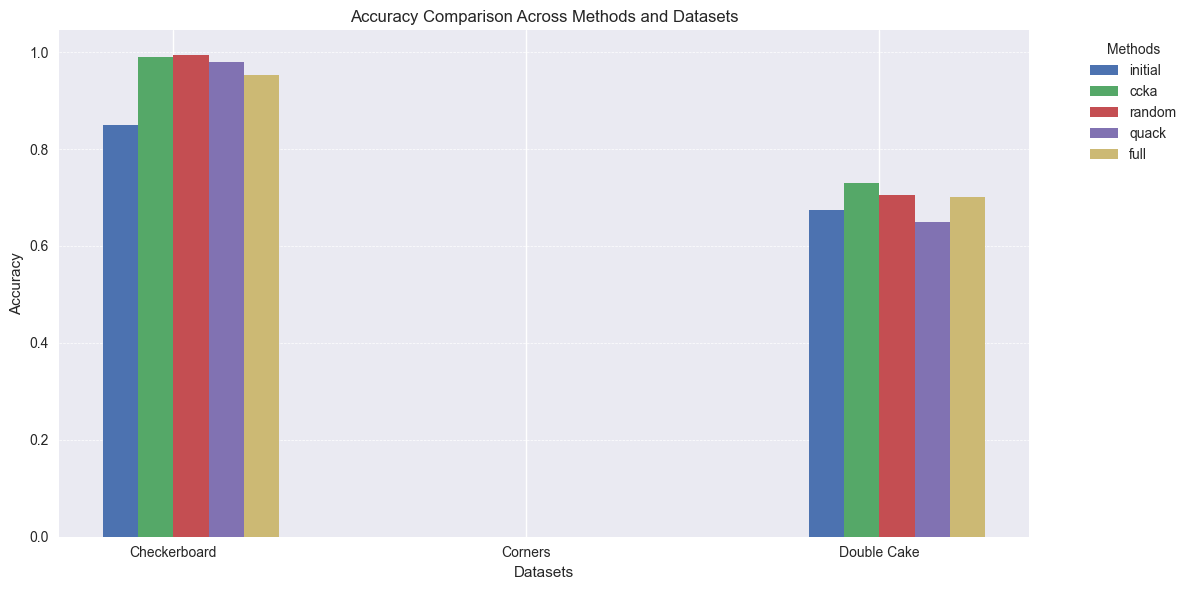

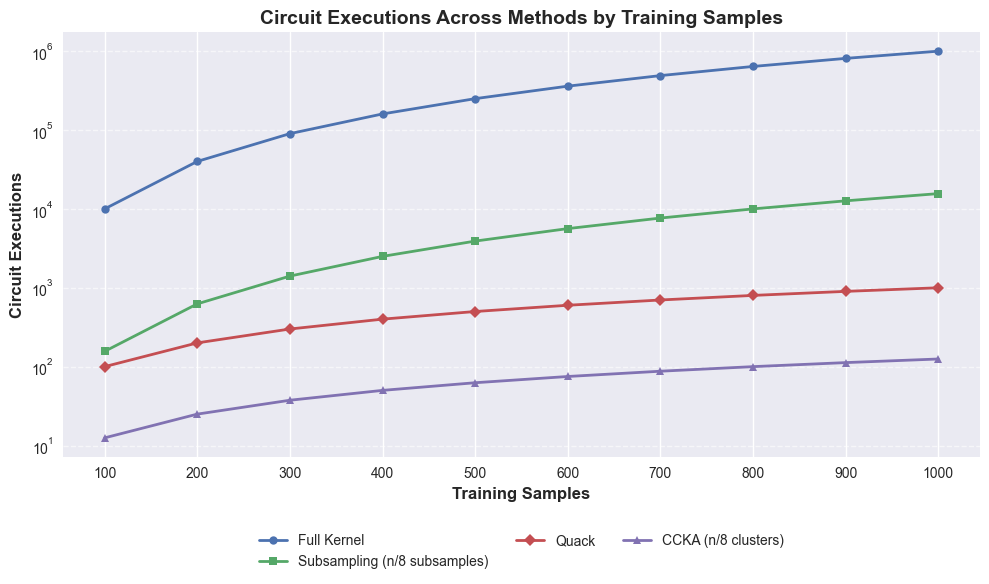

In [25]:
#Overall Comparisiom

#===============================
#Accuracy Comparision
#===============================

datasets = ['Checkerboard', 'Corners', 'Double Cake']
methods = ['initial', 'ccka', 'random', 'quack', 'full']

checkerboard_initial_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'ccka']['accuracy_test_init'].mean()
checkerboard_ccka_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'ccka']['accuracy_test_final'].mean()
checkerboard_random_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'random']['accuracy_test_final'].mean()
checkerboard_quack_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'quack']['accuracy_test_final'].mean()
checkerboard_full_means = results_01_checkerboard[results_01_checkerboard['config.train_method'] == 'full']['accuracy_test_final'].mean()

corners_initial_means = results_01_corners[results_01_corners['config.train_method'] == 'ccka']['accuracy_test_init'].mean()
corners_ccka_means = results_01_corners[results_01_corners['config.train_method'] == 'ccka']['accuracy_test_final'].mean()
corners_random_means = results_01_corners[results_01_corners['config.train_method'] == 'random']['accuracy_test_final'].mean()
corners_quack_means = results_01_corners[results_01_corners['config.train_method'] == 'quack']['accuracy_test_final'].mean()
corners_full_means = results_01_corners[results_01_corners['config.train_method'] == 'full']['accuracy_test_final'].mean()

double_cake_initial_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'ccka']['accuracy_test_init'].mean()
double_cake_ccka_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'ccka']['accuracy_test_final'].mean()
double_cake_random_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'random']['accuracy_test_final'].mean()
double_cake_quack_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'quack']['accuracy_test_final'].mean()
double_cake_full_means = results_01_double_cake[results_01_double_cake['config.train_method'] == 'full']['accuracy_test_final'].mean()


# Accuracy values for each dataset and method
accuracy_values = [
    [
        checkerboard_initial_means,
        checkerboard_ccka_means,
        checkerboard_random_means,
        checkerboard_quack_means,
        checkerboard_full_means,
    ],
    [
        corners_initial_means,
        corners_ccka_means,
        corners_random_means,
        corners_quack_means,
        corners_full_means,
    ],
    [
        double_cake_initial_means,
        double_cake_ccka_means,
        double_cake_random_means,
        double_cake_quack_means,
        double_cake_full_means,
    ],
]

# Plotting
x = np.arange(len(datasets))  # Dataset indices
bar_width = 0.1

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

# Plot bars for each method
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, [dataset[i] for dataset in accuracy_values], width=bar_width, label=method)

# Add labels, title, and legend
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Methods and Datasets")
plt.xticks(x + 1.5 * bar_width, datasets)  # Center dataset labels

plt.grid(axis='y', linestyle='--', linewidth=0.5)
# Place the legend outside the chart
plt.legend(title="Methods", loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout for better fit
plt.tight_layout()
# Display the plot
plt.show()


#===============================
#Accuracy Comparision
#===============================

# Data for clusters and average executions
clusters = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
avg_executions = [
    clusters * clusters,     # Full Kernel
    clusters/8 * clusters/8, # Subsampling for n/8 subsamples
    clusters,                 # Quack
    clusters/8               #CCKA for n/8 subsamples
]

# Labels and markers
methods = ['Full Kernel', 'Subsampling (n/8 subsamples)', 'Quack', 'CCKA (n/8 clusters)']
markers = ['o', 's', 'D', '^']
# Updated plot with continuous x-axis ticks from 100 to 1000
fig, ax = plt.subplots(figsize=(10, 6))

for i, method in enumerate(methods):
    ax.plot(
        clusters,
        avg_executions[i],
        label=f"{method}",
        marker=markers[i % len(markers)],
        markersize=6,
        linewidth=2
    )

# Set labels and title
ax.set_xlabel("Training Samples", fontsize=12, fontweight='bold')
ax.set_ylabel("Circuit Executions", fontsize=12, fontweight='bold')
ax.set_title("Circuit Executions Across Methods by Training Samples", fontsize=14, fontweight='bold')

# Use logarithmic scale for the y-axis
ax.set_yscale('log')

# Set continuous x-axis ticks
ax.set_xticks(clusters)

# Customize grid and legend
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Position the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)

plt.tight_layout()
plt.show()
fig.savefig("circuit_executions_high_def.png", dpi=300, bbox_inches="tight")
